# Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering

![Alt text](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! 

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

In [1]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
penguins_df = pd.read_csv("data/penguins.csv")
penguins_df.info()
penguins_df.isna().sum()
penguins_clean = penguins_df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


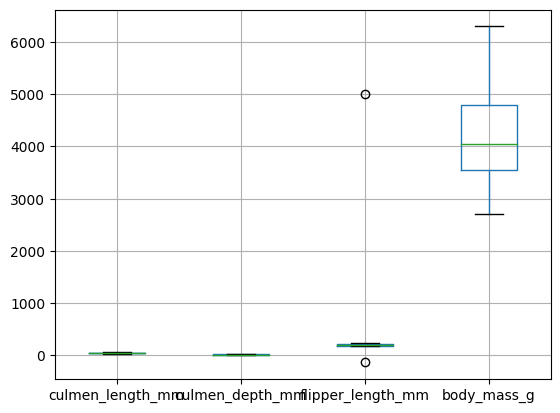

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   333 non-null    float64
 1   culmen_depth_mm    333 non-null    float64
 2   flipper_length_mm  333 non-null    float64
 3   body_mass_g        333 non-null    float64
 4   sex                333 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB


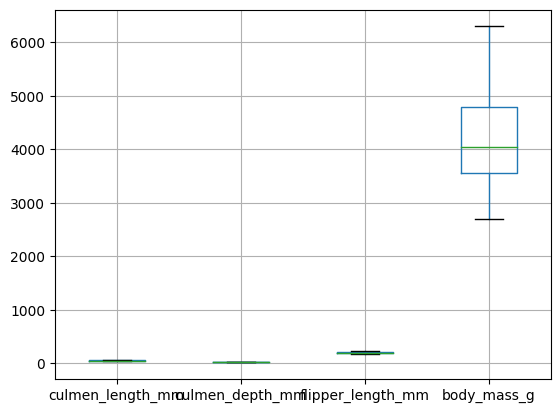

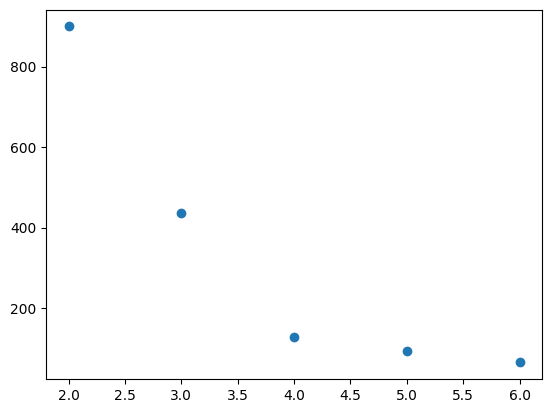

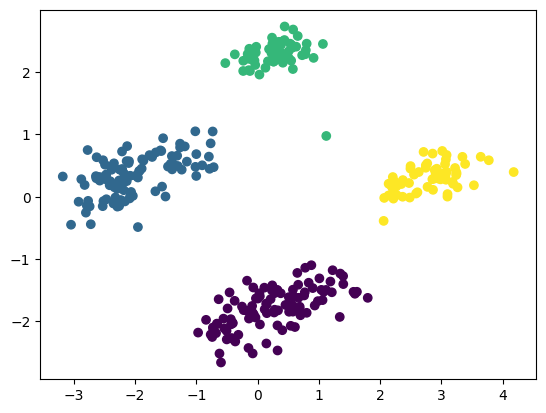

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
label                                                                   
0             43.878302        19.111321         194.764151  4006.603774
1             40.217757        17.611215         189.046729  3419.158879
2             45.545763        14.262712         212.779661  4683.050847
3             49.473770        15.718033         221.540984  5484.836066


In [118]:


# Loading and examining the dataset


# mass_sex_f=penguins_clean.groupby('sex')['body_mass_g'].mean()
# std_sex_f=penguins_clean.groupby('sex')['body_mass_g'].std()
# min_avg_male_mass = mass_sex_f['MALE'] - std_sex_f['MALE']
# def fill_missing_sex(row):
#     if pd.isna(row['sex']):
#         if row['body_mass_g'] < min_avg_male_mass:
#             return 'FEMALE'
#         else:
#             return 'MALE'
#     else:
#         return row['sex']

# penguins_clean['sex'] = penguins_clean.apply(fill_missing_sex, axis=1)
# penguins_clean.isna().sum()

#Detect and remove outliers
penguins_clean.boxplot()  
plt.show()

q1=penguins_clean['flipper_length_mm'].quantile(0.25)
q3=penguins_clean['flipper_length_mm'].quantile(0.75)
IQR= q3-q1
factor=1.5
lower_limit = q1 - (IQR*factor)
upper_limit = q3 + (IQR*factor)
outliers = (penguins_clean['flipper_length_mm'] < lower_limit) | (penguins_clean['flipper_length_mm'] > upper_limit)
penguins_clean = penguins_clean[~outliers].reset_index(drop=True)
penguins_clean.info()
penguins_clean.boxplot()  
plt.show()

#Preprocesing data - create dummy variable for sex feature
dummy_penguins_clean=pd.get_dummies(penguins_clean, columns=['sex'], drop_first=True)
dummy_penguins_clean.head()

#scale data 
scaler = StandardScaler()
penguins_preprocessed=scaler.fit_transform(dummy_penguins_clean)

#Perform PCA to get the desired number of components
pca = PCA()
pca.fit(penguins_preprocessed)
features = range(pca.n_components_)
pca_var_ratio = (pca.explained_variance_ratio_)>0.1
n_components=pca_var_ratio.sum()

#Perform PCA with n_components 
pca_n = PCA(n_components=n_components)
pca_n.fit(penguins_preprocessed)
penguins_PCA = pca_n.transform(penguins_preprocessed)

#KMeans clustering 
range_n_clusters = [2, 3, 4, 5, 6]
kmeans_model_inertias =[]
for n_cluster in range_n_clusters:
    k_means_model = KMeans(n_clusters=n_cluster,random_state=42)
    k_means_model.fit(penguins_PCA)
    kmeans_model_inertias.append(k_means_model.inertia_)

#Elbow analysis to determine number of clusters
plt.scatter(range_n_clusters,kmeans_model_inertias)
plt.show()

n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters,random_state=42)
kmeans.fit(penguins_PCA)
predicted_clusters = kmeans.predict(penguins_PCA)
labels = kmeans.labels_

#Visualize clusters
x=penguins_PCA[:,0]
y=penguins_PCA[:,1]
plt.scatter(x,y,c=labels)
plt.show()

penguins_clean['label']=labels
penguins_clean.head()
stat_penguins = penguins_clean.groupby('label')[['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']].mean()
print(stat_penguins)